In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('train.csv')
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
cor=data.corr()
cor

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


In [ ]:
abs(cor.loc['current price']).sort_values(ascending=False)

current price    1.000000
km               0.935924
on road now      0.282793
on road old      0.233035
condition        0.110108
v.id             0.059460
rating           0.035038
economy          0.034711
hp               0.030238
top speed        0.027993
years            0.011854
torque           0.002290
Name: current price, dtype: float64

In [ ]:
x=data['km']
y=data['current price']
x=np.array(x/x.mean())
y=np.array(y/y.mean())

In [ ]:
print(np.shape(x),np.shape(y))

(1000,) (1000,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
print(np.shape(xtrain),np.shape(xtest))

(800,) (200,)


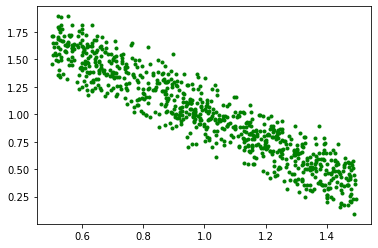

In [ ]:
plt.plot(xtrain,ytrain,'g.')

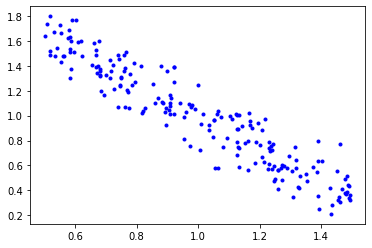

In [ ]:
plt.plot(xtest, ytest, 'b.')

In [ ]:
def hypothesis(a,b,x):
  return a*x + b

In [ ]:
def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e += np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/(2*m)) *e

In [ ]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis(a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
  a = a- (grad_a * learning_rate)
  b = b- (grad_b * learning_rate)
  return a,b

In [ ]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,xtrain, ytrain, learning_rate, iterations)

Error: 0.08410743185528424, a: 0, b: 1
Error: 0.042155141563177054, a: -0.46470272218681213, b: 1.4295851627626035
Error: 0.024433571961239412, a: -0.7539911181911884, b: 1.731396477492224
Error: 0.016671428479635392, a: -0.9454478998318403, b: 1.9311411744464897
Error: 0.013271567587944262, a: -1.0721577843147843, b: 2.063336165192023
Error: 0.011782410100679916, a: -1.1560168917754705, b: 2.1508254244548737
Error: 0.011130151054642226, a: -1.211516507553665, b: 2.2087275464883502
Error: 0.01084445805925623, a: -1.248247250877773, b: 2.247048315965973
Error: 0.010719322979707019, a: -1.272556383224446, b: 2.272409759066592
Error: 0.01066451313702034, a: -1.2886446477671398, b: 2.289194463677537


In [ ]:
print(error(a,b,xtrain, ytrain))
print(error(final_a,final_b, xtrain, ytrain))

0.08410743185528424
0.01064050612902421


In [ ]:
err=error(final_a, final_b, xtest, ytest)
err

0.009229539171096693

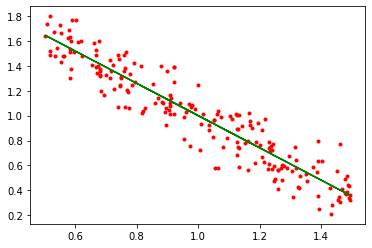

In [ ]:
plt.plot(xtest, ytest, 'r.', xtest, hypothesis(final_a, final_b, xtest), 'g')

In [ ]:
accuracy=(1-err)*100
accuracy

99.07704608289033